In [13]:
#import nltk
#nltk.download('punkt')
# import nltk
# nltk.download('wordnet')
# import nltk
# nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Mr Cab
[nltk_data]     Driver\AppData\Roaming\nltk_data...


True

# Jezični alat za analizu slogova korpusa
## Opojančivanje na slogove te generiranje govornog materijala | Ivan Porupski 2024(c)

Ovaj jezični alat uzima korpus teksta, tokenizerom odvaja prvo riječi iz rečenica, zatim svaku riječ na slogove prema hierarhiji sonornosti (NLTK).
Dobivene slogove analizira:
- Koliko jedinstvenih slogova postoji?
- Koliko svakog jedinstvenog sloga ima često?
- Koliko slogova ima u svakoj pojedinoj riječi teksta?
- Koliko svaki slog ima fonema?
- Koliko ima n-fonemskih slogova?


# [0.] START THE MACHINE

In [1]:
%%time
import nltk

# Check if NLTK is installed
try:
    import nltk
    nltk_installed = True
except ImportError:
    nltk_installed = False

if nltk_installed:
    # Print NLTK version
    print("NLTK version:", nltk.__version__)
else:
    print("NLTK is not installed.")


NLTK version: 3.8.1
CPU times: total: 938 ms
Wall time: 3.22 s


In [2]:
%%time

import re
import warnings
from string import punctuation
from nltk.tokenize import word_tokenize, SyllableTokenizer

class CroatianSyllableTokenizer:
    def __init__(self, lang="hr", sonority_hierarchy=None):
        if not sonority_hierarchy and lang == "hr":
            sonority_hierarchy = [
                "aeiour",   # vowels in Croatian
                "lmnj",     # nasals
                #"r",       # rhotic
                "zžvsšf",    # fricatives
                "bcćčdđgtkpqxh",  # stops
                " ",        # Space
            ]
        self.syllable_tokenizer = SyllableTokenizer(sonority_hierarchy=sonority_hierarchy)

    def tokenize(self, text):
        words = word_tokenize(text)  # Tokenize the text into words
        words = [word for word in words if word not in [' ']]  # Remove empty spaces
        syllables = [self.syllable_tokenizer.tokenize(word) for word in words]  # Tokenize each word into syllables
        return syllables

# DISPLAY SLOGOVA U OUTPUTU
def print_syllables(syllables, words_per_row=5, rows_to_display=5):
    words_count = 0
    rows_count = 0
    for word_syllables in syllables:
        word = ' '.join(word_syllables)
        print(word, end=' ')
        words_count += 1
        if words_count >= words_per_row:
            print()  # Empty line to separate rows
            words_count = 0
            rows_count += 1
            if rows_count >= rows_to_display:
                return

# Example usage
tokenizer = CroatianSyllableTokenizer()
print(f"Tokenizer aktivan:\n {tokenizer}\n")
text_npr = "dobar dan kako smo danas što si jeo što si radio kada je padala tuča meni ravno u džep ovo je primjer teksta za tokenizaciju na slogove ideja je postići nešto što će razbiti riječi pa time i moći slagati lažne riječi koje zvuče hrvatski"
syllables = tokenizer.tokenize(text_npr)

print("Primjer rastavljanja na slogove:")
print_syllables(syllables, words_per_row=5, rows_to_display=10)


Tokenizer aktivan:

Primjer rastavljanja na slogove:
do bar dan ka ko smo da nas 
što si jeo što si 
ra dio ka da je pa da la tu ča 
me ni ra vno u džep o vo 
je prim jer teks ta za to ke ni za ci ju 
na slo go ve i de ja je pos ti ći 
neš to što će raz bi ti ri je či 
pa ti me i mo ći sla ga ti 
la žne ri je či ko je zvu če hr vats ki 
CPU times: total: 15.6 ms
Wall time: 7.98 ms


In [3]:
%%time
# LOAD CUSTOM TEXT CORPORA
# Clean text from characters not found within the sonority hierarchy

# Tokenizer has custom-made HR default:
# sonority_hierarchy = [
#      "aeiour",   # vowels in Croatian
#      "lmnj",     # nasals
#      #"r",       # rhotic
#      "zžvsšf",    # fricatives
#      "bcćčdđgtkpqxh",  # stops
#      " ",        # Space
#  ]

import re

# FILE TXT LOCATION
corpus_txt_file = "blok_teksta_jedan_ParlaSpeech-HR.v1.2.txt"

with open(corpus_txt_file, "r", encoding="utf-8") as file:
    corpus_text = file.read()


# Cleaning text from everything but sonority elements
def clean_text(corpus_text, valid_chars):
    # Define regex pattern to match characters not in the sonority hierarchy
    pattern = f"[^{valid_chars}]"
    
    # Remove characters not in the sonority hierarchy
    cleaned_corpus_text = re.sub(pattern, '', corpus_text)
    
    # Normalize consecutive spaces to a single space
    cleaned_corpus_text = re.sub(r'\s+', ' ', cleaned_corpus_text)
    
    return cleaned_corpus_text

# GLAVNA VARIJABLA SADA JE cleaned_corpus_text
valid_chars = "aeiourlmnjzžvsšfbcćčdđgtkph "
print(f"Broj fonema: {len(valid_chars)-1} plus razmak \n (fonemi /nj, lj, dž/ se broje kao kombinaciju n+j itd.)\n")

cleaned_corpus_text = clean_text(corpus_text, valid_chars)
print(f"Prvih 100 znakova:\n{cleaned_corpus_text[:100]} ...")

# syllables_txt = tokenizer.tokenize(text)
# print_syllables(syllables_txt, words_per_row=5, rows_to_display=10)

Broj fonema: 27 plus razmak 
 (fonemi /nj, lj, dž/ se broje kao kombinaciju n+j itd.)

Prvih 100 znakova:
lijepo kolegice i kolege nemojte se vi varda hihotat prije g ste izdali birače sad jedva čekam da vi ...
CPU times: total: 4.5 s
Wall time: 4.67 s


## TOKENIZE A CORPUS

In [4]:
%%time


# TOKENIZE CORPUS INTO SYLLABLES (Time intensive, rather LOAD the 134MB file)


tokenizer = CroatianSyllableTokenizer()
print(f"Tokenizer aktivan: {tokenizer}\n")

# SLOGOVI cleaned_corpus_text-a
syllables = tokenizer.tokenize(cleaned_corpus_text)
print_syllables(syllables, words_per_row=5, rows_to_display=10)

Tokenizer aktivan: <__main__.CroatianSyllableTokenizer object at 0x0000023F89BDE250>

li je po ko le gi ce i ko le ge ne moj te 
se vi var da hi ho tat pri je 
g ste iz da li bir a če sad 
je dva če kam da vi dim ka ko 
će vas na gra dit je dva če kam 
hva la li je po ko le gi ce i ko le ga 
ko le ge zas tu pni ci g pot pre dsje dni če hdz 
že li po ku ša ti da ti o be ćan je za 
mje se ci da će ne ki gra đa ni 
do bi ti sto ti na ku na i je di na 
CPU times: total: 1min 39s
Wall time: 1min 39s


## SAVE TOKENIZED CORPUS

In [5]:
# SAVE SYLLABLIZED CORPUS TEXT as CSV
# UTF-8 encoding

import csv

def save_syllables_to_csv(syllables, file_path):
    with open(file_path, 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        for sublist in syllables:
            writer.writerow(sublist)

#syllables = tokenizer.tokenize(cleaned_corpus_text)
save_syllables_to_csv(syllables, 'blok_ociscen_ParlaSpeechHR_syllables_v1.csv')
print(f"CVS named blok_ociscen_ParlaSpeechHR_syllables_v1.csv has been SAVED.")


CVS named blok_ociscen_ParlaSpeechHR_syllables_v1.csv has been SAVED.


# [1.] LOAD TOKENIZED CORPUS

In [4]:
# LOAD SYLLABLIZED CORPUS TEXT from CSV
# UTF-8 encoding

import csv

def load_syllables_from_csv(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        reader = csv.reader(f)
        syllables = [row for row in reader]
    return syllables

# Example usage:
syllables_load = load_syllables_from_csv('blok_ociscen_ParlaSpeechHR_syllables_v1.csv')
print(f"Function load_syllables_from_csv has been successful!\n")
#print(syllables[:10])

# DISPLAY SLOGOVA U OUTPUTU
def print_syllables(syllables, words_per_row=5, rows_to_display=5):
    words_count = 0
    rows_count = 0
    for word_syllables in syllables:
        word = ' '.join(word_syllables)
        print(word, end=' ')
        words_count += 1
        if words_count >= words_per_row:
            print()  # Empty line to separate rows
            words_count = 0
            rows_count += 1
            if rows_count >= rows_to_display:
                return

words_per_row=5
rows_to_display=10
print(f"Printing loaded CVS: {words_per_row} words each row, for {rows_to_display} rows\n")

print_syllables(syllables_load, words_per_row=5, rows_to_display=10)
syllables = syllables_load

Function load_syllables_from_csv has been successful!

Printing loaded CVS: 5 words each row, for 10 rows

li je po ko le gi ce i ko le ge ne moj te 
se vi var da hi ho tat pri je 
g ste iz da li bir a če sad 
je dva če kam da vi dim ka ko 
će vas na gra dit je dva če kam 
hva la li je po ko le gi ce i ko le ga 
ko le ge zas tu pni ci g pot pre dsje dni če hdz 
že li po ku ša ti da ti o be ćan je za 
mje se ci da će ne ki gra đa ni 
do bi ti sto ti na ku na i je di na 


In [5]:
print(f"type: {type(syllables)}, len: {len(syllables)} words")
print(syllables[:3])
print(len(syllables[0]), len(syllables[1]), len(syllables[2]))

type: <class 'list'>, len: 14250653 words
[['li', 'je', 'po'], ['ko', 'le', 'gi', 'ce'], ['i']]
3 4 1


# [2.] VAR MACHINE Output

In [8]:
%%time
from collections import Counter
from collections import defaultdict

def dig_in_stats(syllables):

    # syllables is a list like:
    # [['li', 'je', 'po'], ['ko', 'le', 'gi', 'ce'], ['i']...]
    # where it contains each word's syllables in a list within.

    # Corpora size WORDS / Opseg korpusa RIJEČI
    #VAR1
    total_words = len(syllables)
    print(f"VAR1 Corpora size WORDS / Opseg korpusa RIJEČI: {total_words}\n")

    
    # Count of unique WORDS / Broj jedinstvenih RIJEČI
    #VAR2
    unique_words = Counter(tuple(slogo) for slogo in syllables)
    print(f"VAR2 Count of unique WORDS / Broj jedinstvenih RIJEČI: {len(unique_words)}\n")
    # Distribution of unique WORDS / Čestotna frekvencija jedinsvenih RIJEČI
    ### Irrelevant for semantically empty material

    
    #VAR3 Corpora size SYLLABLES / Opseg korpusa SLOG
    total_syllables = sum(len(sublist) for sublist in syllables)
    print(f"VAR3 Corpora size SYLLABLES / Opseg korpusa SLOGOVI: {total_syllables}\n")
    
    
    # Count of unique SYLLABLES / Broj jedinstvenih SLOGOVA
    unique_syllables = {}
    for word_syllables in syllables:
        for syllable in word_syllables:
            if syllable in unique_syllables:
                unique_syllables[syllable] += 1
            else:
                unique_syllables[syllable] = 1
    
    #VAR4 Distribution of unique SYLLABLES / Čestotna frekvencija jedinsvenih SYLLABLES
    unique_syllables_sorted = sorted(unique_syllables.items(), key=lambda x: x[1], reverse=True)
    unique_syllables_sorted = [list(t) for t in unique_syllables_sorted]
    print(f"VAR4 Count of unique SYLLABLES / Broj jedinstvenih SLOGOVI: {len(unique_syllables_sorted)}\n")

    
    #VAR5 Count of SYLLABLES PER WORD / Broj SLOGOVA U svakoj RIJEČI
    syllables_per_word = [len(word_syllables) for word_syllables in syllables]
   
    # Distribution of SYLLABLES PER WORD / Čestotna frekvencija broja SLOGOVA U svakoj RIJEČI
    # SPW = syllables per word
    SPW_frequency = Counter(syllables_per_word)
    sorted_SPW_frequency = sorted(SPW_frequency.items(), key=lambda x: x[0])
    sorted_SPW_frequency = [list(t) for t in sorted_SPW_frequency]

    # PRINT SPW FREQUENCY
    print(f"VAR5 Syllables per word frequencies / Broj slogova po riječi: \n")
    for syllable_count, frequency in sorted_SPW_frequency:
        syllable_string = f"{syllable_count}-složne riječi"
        print(f"{syllable_string}: {frequency}")
    print(f"\n")


    
    
    #VAR6.1 Corpora size PHONEMES / Opseg korpusa FONEMA
    phoneme_counts = defaultdict(int)
    for p_sublist in syllables:
        for word in p_sublist:
            for char in word:
                phoneme_counts[char] += 1

    phoneme_counts = dict(sorted(phoneme_counts.items(), key=lambda item: item[1], reverse=True))
    

    total_phonemes = sum(phoneme_counts.values())
    print(f"VAR6 Corpora size PHONEMES / Opseg korpusa FONEMI: {total_phonemes}\n")

    #VAR6.2 Count of unique PHONEMES / Broj jedinstvenih FONEMA
    print(f"VAR7 Count of unique PHONEMES / Broj jedinstvenih FONEMA: {len(phoneme_counts)}\n")
    for char, count in phoneme_counts.items():
        print(f"{char}: {count}")
    print(f"\n")
    
    phoneme_counts = [[key, value] for key, value in phoneme_counts.items()]


    #VAR7 Count of PHONEMES PER SYLLABLE / Broj FONEMA U svakom SLOGU
    syllable_counts = defaultdict(int)
    
    for sublist in syllables:
        for word in sublist:
            syllable_counts[len(word)] += 1
    
    # PPS = PHONEMES PER SYLLABLE
    sorted_PPS_counts = sorted(syllable_counts.items(), key=lambda x: x[0], reverse=False)
    sorted_PPS_counts = [[item[0], item[1]] for item in sorted_PPS_counts]
    
    # PRINT SPC FREQUENCY
    print(f"VAR8 Phonemes per syllable / Fonema po slogu:\n")
    for length, count in sorted_PPS_counts:
        print(f"{length}-fonski: {count}")

    
    print(f"\n")
    print(f"endo frendo ")


    return total_words, unique_words, total_syllables, unique_syllables_sorted, syllables_per_word, phoneme_counts, sorted_SPW_frequency, sorted_PPS_counts
 

CPU times: total: 0 ns
Wall time: 0 ns


In [10]:
%%time
total_words, unique_words, total_syllables, unique_syllables_sorted, syllables_per_word, phoneme_counts, sorted_SPW_frequency, sorted_PPS_counts = dig_in_stats(syllables)

VAR1 Corpora size WORDS / Opseg korpusa RIJEČI: 14250653

VAR2 Count of unique WORDS / Broj jedinstvenih RIJEČI: 173225

VAR3 Corpora size SYLLABLES / Opseg korpusa SLOGOVI: 31675582

VAR4 Count of unique SYLLABLES / Broj jedinstvenih SLOGOVI: 9207

VAR5 Syllables per word frequencies / Broj slogova po riječi: 

1-složne riječi: 5061426
2-složne riječi: 3950650
3-složne riječi: 2979291
4-složne riječi: 1672845
5-složne riječi: 462241
6-složne riječi: 102219
7-složne riječi: 18440
8-složne riječi: 2614
9-složne riječi: 533
10-složne riječi: 91
11-složne riječi: 267
12-složne riječi: 31
13-složne riječi: 1
15-složne riječi: 1
16-složne riječi: 3


VAR6 Corpora size PHONEMES / Opseg korpusa FONEMI: 71666748

VAR7 Count of unique PHONEMES / Broj jedinstvenih FONEMA: 27

a: 8473320
o: 7134726
i: 7050533
e: 6080196
n: 4648748
t: 3651668
r: 3511665
j: 3419250
s: 3255595
d: 2834497
u: 2828080
v: 2702877
m: 2543126
k: 2461565
l: 2239951
p: 2027631
z: 1281364
g: 1117595
b: 952252
š: 681802
č: 56

In [11]:
print(phoneme_counts)

[['a', 8473320], ['o', 7134726], ['i', 7050533], ['e', 6080196], ['n', 4648748], ['t', 3651668], ['r', 3511665], ['j', 3419250], ['s', 3255595], ['d', 2834497], ['u', 2828080], ['v', 2702877], ['m', 2543126], ['k', 2461565], ['l', 2239951], ['p', 2027631], ['z', 1281364], ['g', 1117595], ['b', 952252], ['š', 681802], ['č', 565108], ['h', 519356], ['c', 512317], ['ć', 477359], ['ž', 410163], ['đ', 163320], ['f', 122684]]


## Određivanje vjerojatnosti za izradu govornog materijala
Za N rečenica, svaka po M riječi:
- RNG Broj slogova po riječi, distribucija
- RNG Broj fonema po slogu, distribucija
- RNG Jedinstven slog tog broja fonema, distribucija

In [12]:
print(sorted_PPS_counts)

[[1, 3270564], [2, 18773689], [3, 7901801], [4, 1518970], [5, 195945], [6, 14556], [7, 42], [8, 3], [9, 2], [10, 1], [12, 1], [13, 8]]


In [13]:
print(sorted_SPW_frequency)

[[1, 5061426], [2, 3950650], [3, 2979291], [4, 1672845], [5, 462241], [6, 102219], [7, 18440], [8, 2614], [9, 533], [10, 91], [11, 267], [12, 31], [13, 1], [15, 1], [16, 3]]


In [14]:
#print(unique_syllables_sorted[:30])
#unique_syllables_sorted_dict = {key: value for key, value in unique_syllables_sorted}
#len(unique_syllables_sorted_dict)
#print(unique_syllables_sorted_dict)
unique_syllables_sorted2 = [sublist + [len(sublist[0])] for sublist in unique_syllables_sorted]
print(unique_syllables_sorted2[:30])

[['je', 1239968, 2], ['i', 990473, 1], ['o', 820551, 1], ['da', 764537, 2], ['ko', 727848, 2], ['na', 715544, 2], ['ti', 681299, 2], ['u', 664127, 1], ['a', 523374, 1], ['ne', 520557, 2], ['li', 502407, 2], ['po', 457849, 2], ['ni', 453717, 2], ['ma', 442325, 2], ['za', 436560, 2], ['to', 428449, 2], ['ja', 404643, 2], ['mo', 404034, 2], ['ta', 363511, 2], ['ka', 358946, 2], ['se', 342439, 2], ['vi', 295350, 2], ['di', 295232, 2], ['va', 288727, 2], ['te', 275250, 2], ['do', 261165, 2], ['ju', 252175, 2], ['bi', 246787, 2], ['no', 244793, 2], ['ci', 242588, 2]]


In [15]:
print(phoneme_counts)

[['a', 8473320], ['o', 7134726], ['i', 7050533], ['e', 6080196], ['n', 4648748], ['t', 3651668], ['r', 3511665], ['j', 3419250], ['s', 3255595], ['d', 2834497], ['u', 2828080], ['v', 2702877], ['m', 2543126], ['k', 2461565], ['l', 2239951], ['p', 2027631], ['z', 1281364], ['g', 1117595], ['b', 952252], ['š', 681802], ['č', 565108], ['h', 519356], ['c', 512317], ['ć', 477359], ['ž', 410163], ['đ', 163320], ['f', 122684]]


# [3.] RANDOM SENTENCE CORE GEN
## SPW = syllables per word
## PPS = phonemes per syllable
## UQS = unique syllables

In [16]:
import random

def normalize_func(data_list):
    total = sum(item[1] for item in data_list)
    return [[item[0], item[1] / total] for item in data_list]

# Normalize frequencies
probs_SPW = normalize_func(sorted_SPW_frequency)
probs_SPW_items = [item[0] for item in probs_SPW]
probs_SPW_weights = [item[1] for item in probs_SPW]

probs_PPS = normalize_func(sorted_PPS_counts)
probs_PPS_items = [item[0] for item in probs_PPS]
probs_PPS_weights = [item[1] for item in probs_PPS]

probs_UQS = normalize_func(unique_syllables_sorted)
probs_UQS_items = [item[0] for item in probs_UQS]
probs_UQS_weights = [item[1] for item in probs_UQS]
# print(probs_PPS)
# print(probs_SPW)
# print(probs_UQS[:10])

# Pick a value with the specified distribution
# picked_value = pick_with_distribution(items, probabilities)
# print("Picked value:", picked_value)


SPW_pick = random.choices(probs_SPW_items, weights=probs_SPW_weights, k=1)
print(f"SPW: {SPW_pick}")

PPS_pick = random.choices(probs_PPS_items, weights=probs_PPS_weights, k=int(SPW_pick[0]))
print(f"PPS: {PPS_pick}")

UQS_pick = random.choices(probs_UQS_items, weights=probs_UQS_weights, k=int(SPW_pick[0]))
print(f"UQS: {UQS_pick}")

SPW: [2]
PPS: [2, 3]
UQS: ['ju', 'cio']


## Normalize probs SPW, PPS, UQS, Items and weights

In [17]:
import random

def normalize_func(data_list):
    total = sum(item[1] for item in data_list)
    return [[item[0], item[1] / total] for item in data_list]

# Normalize frequencies
probs_SPW = normalize_func(sorted_SPW_frequency)
probs_SPW_items = [item[0] for item in probs_SPW]
probs_SPW_weights = [item[1] for item in probs_SPW]

probs_PPS = normalize_func(sorted_PPS_counts)
probs_PPS_items = [item[0] for item in probs_PPS]
probs_PPS_weights = [item[1] for item in probs_PPS]

probs_UQS = normalize_func(unique_syllables_sorted)
probs_UQS_items = [item[0] for item in probs_UQS]
probs_UQS_weights = [item[1] for item in probs_UQS]


SPW_pick = random.choices(probs_SPW_items, weights=probs_SPW_weights, k=1)
print(f"SPW: {SPW_pick}")

PPS_pick = random.choices(probs_PPS_items, weights=probs_PPS_weights, k=int(SPW_pick[0]))
print(f"PPS: {PPS_pick}")


def select_UQS(probs_UQS_items, probs_UQS_weights, PPS_pick):
    UQS_picks = []
    for count in PPS_pick:
        for _ in range(1000):  # Maximum 1000 iterations
            UQS_pick = random.choices(probs_UQS_items, weights=probs_UQS_weights, k=1)[0]
            if len(UQS_pick) == count:
                UQS_picks.append(UQS_pick)
                break
        else:
            raise ValueError("Could not find a matching syllable within 1000 iterations.")
    return UQS_picks

UQS_picks = select_UQS(probs_UQS_items, probs_UQS_weights, PPS_pick)
print(f"UQS picks: {UQS_picks}")

# Combine all elements into a single string
combined_string = ''.join(UQS_picks)
print(f"UQS word: {combined_string}")

SPW: [1]
PPS: [3]
UQS picks: ['rad']
UQS word: rad


In [18]:
print(f'probs_SPW_weights, len: {len(probs_SPW_weights)} \n{probs_SPW_weights[:6]}')

print(f'probs_PPS_weights, len: {len(probs_PPS_weights)} \n{probs_PPS_weights[:5]}')

print(f'probs_UQS_weights, len: {len(probs_UQS_weights)} \n{probs_UQS_weights[:5]}\n\n')

# Function to cut down the list
def cut_weights(weights, max_length=None):
    if max_length is None:
        max_length = len(weights)
    return weights[:max_length]

# Define the desired lengths, setting them to None to use default lengths
max_SPW_length = 5  # Or set to a specific value like 5 if desired
max_PPS_length = 4  # Or set to a specific value like 5 if desired
max_UQS_length = 7000  # Or set to a specific value like 5 if desired

# Cut the weights lists
probs_SPW_weights_cut = cut_weights(probs_SPW_weights, max_SPW_length)
probs_PPS_weights_cut = cut_weights(probs_PPS_weights, max_PPS_length)
probs_UQS_weights_cut = cut_weights(probs_UQS_weights, max_UQS_length)

# Cut the items lists
probs_SPW_items_cut = cut_weights(probs_SPW_items, max_SPW_length)
probs_PPS_items_cut = cut_weights(probs_PPS_items, max_PPS_length)
probs_UQS_items_cut = cut_weights(probs_UQS_items, max_UQS_length)

# Print the results
print(f'probs_SPW_items_cut, len: {len(probs_SPW_items_cut)} \n{probs_SPW_items_cut[:6]}')

print(f'probs_PPS_items_cut, len: {len(probs_PPS_items_cut)} \n{probs_PPS_items_cut[:5]}')

print(f'probs_UQS_items_cut, len: {len(probs_UQS_items_cut)} \n{probs_UQS_items_cut[:5]}\n\n')


probs_SPW_weights, len: 15 
[0.355171513894837, 0.27722589273628373, 0.2090634723896512, 0.11738725235959363, 0.032436478524878826, 0.00717293446131907]
probs_PPS_weights, len: 12 
[0.1032518992074084, 0.5926864737639232, 0.24946032562243056, 0.04795397287412115, 0.00618599525653546]
probs_UQS_weights, len: 9207 
[0.0391458632078173, 0.03126929127932045, 0.02590484367422199, 0.024136478376308917, 0.022978204473085923]


probs_SPW_items_cut, len: 5 
[1, 2, 3, 4, 5]
probs_PPS_items_cut, len: 4 
[1, 2, 3, 4]
probs_UQS_items_cut, len: 7000 
['je', 'i', 'o', 'da', 'ko']




# RNG SPEECH MATERIAL GENERATOR FOR REAL v2
## Generated full words based on syllable distribution and frequencies

In [19]:
def load_phoneme_frequencies(file_path):
    phoneme_frequencies = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            phoneme, frequency, probability = line.strip().split('\t')
            phoneme_frequencies[phoneme] = int(frequency)
    return phoneme_frequencies

# Example usage:
phon_freq_file_path = 'frek_fonema_v3.0.txt' 
phoneme_frequencies = load_phoneme_frequencies(phon_freq_file_path)
print(phoneme_frequencies)

{'a': 8473320, 'o': 7134726, 'i': 7050533, 'e': 6080196, 'n': 4218185, 't': 3651668, 'r': 3511665, 's': 3255595, 'd': 2831100, 'u': 2828080, 'v': 2702877, 'j': 2634376, 'm': 2543126, 'k': 2461565, 'p': 2027631, 'l': 1885640, 'z': 1281364, 'g': 1117595, 'b': 952252, 'š': 681802, 'č': 565108, 'h': 519356, 'c': 512317, 'ć': 477359, 'nj': 430563, 'ž': 406766, 'lj': 354311, 'đ': 163320, 'f': 122684, 'dž': 3397}


## STIMULUS govornog materijala

In [20]:
phons_string = "ptkbdgsšzžfhcčđjnmrlv"
phons = [phon for phon in phons_string]
phons_length = len(phons)
print(f"Total: {len(phons)}\n {phons}")

Total: 21
 ['p', 't', 'k', 'b', 'd', 'g', 's', 'š', 'z', 'ž', 'f', 'h', 'c', 'č', 'đ', 'j', 'n', 'm', 'r', 'l', 'v']


In [21]:
import random
from scipy.stats import linregress

class TextGenerator:
    def __init__(self, probs_SPW_weights, unique_syllables_sorted, max_syllables):
        self.probs_SPW_weights = probs_SPW_weights
        self.unique_syllables_sorted = unique_syllables_sorted
        self.max_syllables = max_syllables

    def generate_random_word(self, probs_SPW_items, probs_SPW_weights, probs_PPS_items, probs_PPS_weights, probs_UQS_items, probs_UQS_weights):
        # Determine the number of syllables in the word
        SPW_pick = random.choices(probs_SPW_items, weights=probs_SPW_weights, k=1)[0]
        if SPW_pick > max_syllables:
            SPW_pick = max_syllables
        #print(f"SPW_pick: {SPW_pick}")
        
        PPS_pick = random.choices(probs_PPS_items, weights=probs_PPS_weights, k=SPW_pick)
        #print(f"PPS_pick: {PPS_pick}")

        # Select unique syllables for the word
        UQS_picks = []
        for count in PPS_pick:
            for _ in range(1000000):  # Maximum 1000 iterations
                UQS_pick = random.choices(probs_UQS_items, weights=probs_UQS_weights, k=1)[0]
                if len(UQS_pick) == count:
                    UQS_picks.append(UQS_pick)
                    break
            else:
                raise ValueError("Could not find a matching syllable within 1000 iterations.")
        #print(f"UQS_picks: {UQS_picks}")
        # Combine syllables into a single word
        word = ''.join(UQS_picks)
        return word

    def generate_text(self, 
                      n_sentences, 
                      n_words_per_sentence, 
                      probs_SPW_items, 
                      probs_SPW_weights, 
                      probs_PPS_items, 
                      probs_PPS_weights, 
                      probs_UQS_items, 
                      probs_UQS_weights):
        
        # Generate text by joining multiple words into sentences
        sentences = []
        for _ in range(n_sentences):
            sentence = ' '.join(self.generate_random_word(probs_SPW_items, 
                                                          probs_SPW_weights, 
                                                          probs_PPS_items, 
                                                          probs_PPS_weights, 
                                                          probs_UQS_items, 
                                                          probs_UQS_weights) for _ in range(n_words_per_sentence))

            ### DODAVANJE STIMULUSA OVĐE
            
            if phons:  # Check if phons list is not empty
                phon_index = _ % phons_length  # Calculate the index of the current phoneme
                sentence += " a" + phons[phon_index] + "a"  # Append the phoneme to the sentence

            sentences.append(sentence)

        text = '\n'.join(sentences)  # Join sentences with new lines
        return text


    def calculate_r_squared(self, target_frequencies, generated_text):
        # Count phoneme frequencies in the generated text
        generated_frequencies = {}
        for phoneme in target_frequencies:
            generated_frequencies[phoneme] = generated_text.count(phoneme)

        # Calculate R-squared value
        x = [target_frequencies[phoneme] for phoneme in target_frequencies]
        y = [generated_frequencies.get(phoneme, 0) for phoneme in target_frequencies]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r_squared = r_value ** 2
        return r_squared



# THE BIG GEN

In [22]:
print(probs_SPW_items)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16]


In [23]:
max_syllables = 2
# n_sentences = 50
n_sentences = 4 * len(phons) # 4 govornika po 21 rečenicu
n_words_per_sentence = 4

# koliko fonema po slogu, vjerojatnosti
#custom_length_probs = [0.3, 0.4, 0.2, 0.1]

print(f"RNG GENERIRANJE REČENICA | max_syllables({max_syllables}), n_sentences({n_sentences}), n_words_per_sentence({n_words_per_sentence}) \n")
print(f"RNG GENERIRANJE REČENICA | max_SPW_length ({max_SPW_length }), max_PPS_length ({max_PPS_length }), max_UQS_length ({max_UQS_length }) \n")

text_generator = TextGenerator(probs_SPW_weights, unique_syllables_sorted, max_syllables)

# Generate text
generated_text = text_generator.generate_text(n_sentences,
                                              n_words_per_sentence,
                                              probs_SPW_items_cut,
                                              probs_SPW_weights_cut,
                                              probs_PPS_items_cut,
                                              probs_PPS_weights_cut, 
                                              probs_UQS_items_cut, 
                                              probs_UQS_weights_cut)

r_squared = text_generator.calculate_r_squared(phoneme_frequencies, generated_text)

print(f"R-squared value: {r_squared:.5f}\n")

print("Generated text:\n", generated_text)

RNG GENERIRANJE REČENICA | max_syllables(2), n_sentences(84), n_words_per_sentence(4) 

RNG GENERIRANJE REČENICA | max_SPW_length (5), max_PPS_length (4), max_UQS_length (7000) 

R-squared value: 0.80548

Generated text:
 zas teu vomči te apa
a strasi di o ata
kou tibi to dus aka
ase drudo vao dio aba
i va ziti polbu ada
naži kićfon damgo vlagle aga
zuja tredi ii kokra asa
mena ba đatu da aša
pose seo netr do aza
zraže zai ninor dlo aža
aji na mamor teljnim afa
mao vljahva tire ti aha
kalžno jeće vnimće nase aca
va sus jene lui ača
turpra ov toih naje ađa
kavoj što kojer ne aja
gojzna go go bnoa ana
žnitre va vapa si ama
štosu suzas ja moji ara
dako o udi metot ala
ve vam dao kao ava
dinis uda tipos iapo apa
pri vor sviti dili ata
revnik tisad to lie aka
manos bu se vostan aba
tve pra maa kodje ada
timan aja sin lisvr aga
odse dnomda dosku tuis asa
ta daod šte vika aša
mobez sezna o tadr aza
idi bnable tuni no aža
mati noma oni zna afa
kotan ne što mipro aha
kednom nadi dija gokor aca


In [68]:
%%time

# Variables to keep track of the best result
best_r_squared = -float('inf')
best_generated_text = ""

# 100 iterations, Highest R-squared value: 0.85969, 25 s
# 200 iterations, Highest R-squared value: 0.86928, 52.8 s
# 1000 iterations, Highest R-squared value: 0.87544, 4min 32s
# 2000 iterations, Highest R-squared value: 0.88040, 8min 50s

# Iterate n times to find the best R-squared value and corresponding text

n_iterate = 20

for _ in range(n_iterate):
    # Generate text
    generated_text = text_generator.generate_text(n_sentences,
                                                  n_words_per_sentence,
                                                  probs_SPW_items_cut,
                                                  probs_SPW_weights_cut,
                                                  probs_PPS_items_cut,
                                                  probs_PPS_weights_cut, 
                                                  probs_UQS_items_cut, 
                                                  probs_UQS_weights_cut)
    
    # Calculate R-squared value
    r_squared = text_generator.calculate_r_squared(phoneme_frequencies, generated_text)
    
    # Update the best result if current R-squared is higher
    if r_squared > best_r_squared:
        best_r_squared = r_squared
        best_generated_text = generated_text

# Print the best result
print(f"Iterated for {n_iterate} iterations \n")
print(f"RNG GENERIRANJE REČENICA | max_syllables({max_syllables}), n_sentences({n_sentences}), n_words_per_sentence({n_words_per_sentence}) \n")
print(f"RNG GENERIRANJE REČENICA | max_SPW_length ({max_SPW_length }), max_PPS_length ({max_PPS_length }), max_UQS_length ({max_UQS_length }) \n")
print(f"Highest R-squared value: {best_r_squared:.5f}\n")
print(f"Best generated text:\n \n{best_generated_text}\n")

Iterated for 20 iterations 

RNG GENERIRANJE REČENICA | max_syllables(2), n_sentences(84), n_words_per_sentence(4) 

RNG GENERIRANJE REČENICA | max_SPW_length (5), max_PPS_length (4), max_UQS_length (7000) 

Highest R-squared value: 0.85221

Best generated text:
 
ji pri diti kom apa
seti ku ni di ata
nas vašbe be ona aka
eji ko kovi jumi aba
daje nia invač ža ada
alju rod jaje tui aga
brojor bi li modrš asa
oza bislo ti koćen aša
navom vatsnu bol suko aza
ci todni bivi ćeđe aža
uu sente isje jeza afa
innog ti ido tosus aha
čnenje nosna oli toza aca
svoj mepo gotro vistal ača
toja jui oa ćešto ađa
čišto tu na loku aja
ku ni uiš cika ana
vniđe rastu pos tene ama
kostčin tio dog jek ara
kono pris skloka jes ala
vičla na priko kune ava
amžje sevo pode kimko apa
neo vi kasli nake ata
modi une viko niko aka
nau na uveć nati aba
o ov pr i ada
prijoj uba su pra aga
dnota getsja na vnibra asa
zatri seze bor deve aša
vom čajpla no piza aza
kor jigle to tovan aža
virpra e vreči udo afa
to vjeno 

# Working material generator above!!
good luck

In [32]:
import math

# Mean intensity values in dB for the signal and noise
mean_intensities_signal_db = [68, 68, 68]  # Add the fourth value when available
mean_intensities_noise_db = [68, 70, 72]

# Check if both lists have the same length
if len(mean_intensities_signal_db) != len(mean_intensities_noise_db):
    raise ValueError("Signal and noise lists must have the same length")

# Function to calculate SNR for a pair of dB values
def calculate_snr(signal_db, noise_db):
    power_signal = 10 ** (signal_db / 10)
    power_noise = 10 ** (noise_db / 10)
    snr_db = 10 * math.log10(power_signal / power_noise)
    return snr_db

# Calculate SNR for each pair and store the results in a list
snr_values = []
for signal_db, noise_db in zip(mean_intensities_signal_db, mean_intensities_noise_db):
    snr_db = calculate_snr(signal_db, noise_db)
    snr_values.append(snr_db)

# Calculate the average SNR
average_snr_db = sum(snr_values) / len(snr_values)

# Print individual SNR values with four decimal places
formatted_snr_values = [f"{snr_db:.4f}" for snr_db in snr_values]
print(f"Individual SNR values (dB): {formatted_snr_values}")

# Print the average SNR with four decimal places
print(f"Average SNR (dB): {average_snr_db:.4f}")




Individual SNR values (dB): ['0.0000', '-2.0000', '-4.0000']
Average SNR (dB): -2.0000


In [40]:
import random
from scipy.stats import linregress

class TextGenerator:
    def __init__(self, sorted_frequency_probs, unique_syllables_sorted, max_syllables):
        self.sorted_frequency_probs = sorted_frequency_probs
        self.unique_syllables_sorted = unique_syllables_sorted
        self.max_syllables = max_syllables

    def generate_random_word(self, custom_length_probs=None, custom_syllable_probs=None):

        # CUSTOM FREQUENCY OF CHARS IN SYLLABLES custom_length_probs
        if custom_length_probs:
            num_syllables = random.choices(range(1, self.max_syllables + 1), weights=custom_length_probs)[0]
        else:
            num_syllables = random.choices([syllable_length for syllable_length, _ in self.sorted_frequency_probs],
                                           weights=[prob for _, prob in self.sorted_frequency_probs])[0]
            #print([prob for _, prob in self.sorted_frequency_probs])
            #print(num_syllables)
        
        
        # CUSTOM FREQUENCY OF UNIQUE SYLLABLES custom_syllable_probs
        if custom_syllable_probs:
            syllable_probs = custom_syllable_probs
        else:            
            syllable_probs = [prob for syllable, prob in self.unique_syllables_sorted if len(syllable) == num_syllables]
            #print(syllable_probs)

        # Choose syllables for the word based on their frequencies
        syllables_with_length = [syllable for syllable, _ in self.unique_syllables_sorted if len(syllable) == num_syllables]
        #print(syllables_with_length)

        # Choose a word syllable based on their frequencies
        word_syllables = random.choices(syllables_with_length, weights=syllable_probs)[0]
        #word_syllables = random.choices(syllables_with_length)[0] #podjednaka distribucija daje mnogo manji R2 (oko 0.6)

        return word_syllables

    def generate_random_sentence(self, n_words):
        # Generate random words to construct a sentence
        sentence = ' '.join(self.generate_random_word() for _ in range(n_words))
        return sentence

    def generate_text(self, n_sentences, n_words_per_sentence):
        # Generate multiple sentences to create a text
        text = '\n'.join(self.generate_random_sentence(n_words_per_sentence) for _ in range(n_sentences))
        return text

    def calculate_r_squared(self, target_frequencies, generated_text):
        # Count phoneme frequencies in the generated text
        generated_frequencies = {}
        for phoneme in target_frequencies:
            generated_frequencies[phoneme] = generated_text.count(phoneme)

        # Calculate R-squared value
        x = [target_frequencies[phoneme] for phoneme in target_frequencies]
        y = [generated_frequencies.get(phoneme, 0) for phoneme in target_frequencies]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r_squared = r_value ** 2
        return r_squared

max_syllables = 6
n_sentences = 50
n_words_per_sentence = 6

# koliko fonema po slogu, vjerojatnosti
custom_length_probs = [0.3, 0.4, 0.2, 0.1]

print(f"RNG GENERIRANJE REČENICA | max_syllables({max_syllables}), n_sentences({n_sentences}), n_words_per_sentence({n_words_per_sentence}) \n")


# Example usage:
text_generator = TextGenerator(sorted_SPW_frequency, unique_syllables_sorted, max_syllables)
generated_text = text_generator.generate_text(n_sentences, n_words_per_sentence)
r_squared = text_generator.calculate_r_squared(phoneme_frequencies, generated_text)
print(f"R-squared value: {r_squared:.5f}\n")
print(generated_text)


RNG GENERIRANJE REČENICA | max_syllables(6), n_sentences(50), n_words_per_sentence(6) 

R-squared value: 0.91857

o gu ko da šnje split
ne zbog u nar kvih tro
a gos sreds ble vo dnog
funk vom da ćem jem dan
su u u vanjs te vješ
o i ja vi o r
u je đan znog u so
brin u bro o a vats
je i sno e ma pa
s ge ta tus u bzir
sa grads po gos dnih pri
i či da funk pre po
me ops dnje u u je
a ći gal di kvog dru
pre zbog tra služ je u
dsje nit sli o poš dje
u sta blem ga ki e
zna ja a lič je dzir
čer po sam vjer tvu i
o u u sve zme mi
i baš a najs a o
i ev hdz i vo da
gih au a u pres i
u go na šlja o đe
ment teš stru o a i
klju i ve šu vnom r
u mos i i u go
dlji bra e u li zaš
o ke čak g a o
sjed en u i je vjer
o snik man ra li o
tre je u bzir tnič i
i gro u si što i
i bor ma i ka ga
i ne a no a cit
u za kom vi di tno
o go a a druš vats
tars i dnos i a pre
o vor i o je dnom
o čnja o a is o
vri pre da ins o svje
o e šnjom u i g
ni o i struk a van
mor ne can is i o
hva ne ner u dnje u
a o troš uz i bl

# Big Science here (analysis)

In [64]:
n=12
result_test = [sublist for sublist in syllables if len(sublist) >= n]

print(f"Words with {n} or more syllables, total hits: {len(result_test)} \n")
# for item in result_test:
#     print(item)
for sublist in result_test:
    # Join the elements of each sublist into a single word
    single_word = ''.join(sublist)
    # Print the single word
    print(single_word)

Words with 12 or more syllables, total hits: 36 

edukacijskorehabilitacijskog
edukacijskorehabilitacijskih
edukacijskorehabilitacijski
edukacijskorehabilitacijskog
edukacijskorehabilitacijskom
edukacijskorehabilitacijsku
edukacijskorehabilitacijska
edukacijskorehabilitacijskom
edukacijskorehabilitacijskom
varaždinivaneclepoglavakrapina
konzervatorskorestauratorskoga
edukacijskorehabilitacijskog
nacionalnimmultinacionalnimzapovjedništvima
edukacijskorehabilitacijskog
edukacijskorehabilitacijskom
pedagoškopsihološkodidaktičkometodičku
nacionalnimmultinacionalnimzapovjedništvima
edukacijskorehabilitacijski
edukacijskorehabilitacijskih
edukacijskorehabilitacijsku
edukacijskorehabilitacijska
edukacijskorehabilitacijske
edukacijskorehabilitacijskog
edukacijskorehabilitacijskoj
edukacijskorehabilitacijske
edukacijskorehabilitacijskoj
edukacijskorehabilitacijskoj
rehabilitacijoresocijalizacijskog
edukacijskorehabilitacijskoj
edukacijskorehabilitacijske
edukacijskorehabilitacijsku
edukacijskor

In [67]:
# Maximum length you want to check for
m = 8

# List to store instances where string length >= m
long_strings = []

# Find all instances where string length >= m
for sublist in syllables:
    for item in sublist:
        if len(item) >= m:
            long_strings.append(item)

print(f"Syllables of {m} or more phonemes, total hits: {len(long_strings)} \n")
for item in long_strings:
    print(item)

Syllables of 8 or more phonemes, total hits: 15 

hdshslshdssba
hdshslshdssba
hdshslshdssba
hdshdssba
hdshslsa
scharzsc
hdshslshdssba
hdshslshdssba
hdshslshdssba
hdzhnssdss
hdshslsa
hdzsdphns
hdshslshdssba
hdshslshdssb
hdshslshdssba


# (ARCHIVED PROGESS)

In [75]:
%%time
# Dictionary to store counts of syllable lengths
syllable_counts = defaultdict(int)

# Count syllable lengths
for sublist in syllables:
    for word in sublist:
        syllable_counts[len(word)] += 1

# Sort counts by frequency in descending order
# SPC = syllable phoneme count
sorted_SPC_counts = sorted(syllable_counts.items(), key=lambda x: x[0], reverse=False)
sorted_SPC_counts = [[item[0], item[1]] for item in sorted_SPC_counts]
total_syllables = sum(len(sublist) for sublist in syllables)

# Print the sorted counts
print(f"Phonemes per syllable (total syllables: {total_syllables}):")
# for length, count in sorted_SPC_counts:
#     print(f"{length}-fonski: {count} occurrences")
print(sorted_SPC_counts)


Phonemes per syllable (total syllables: 31675582):
[[1, 3270564], [2, 18773689], [3, 7901801], [4, 1518970], [5, 195945], [6, 14556], [7, 42], [8, 3], [9, 2], [10, 1], [12, 1], [13, 8]]
CPU times: total: 6.03 s
Wall time: 6.02 s


In [52]:
%%time
from collections import Counter

def count_stats(syllables):
    # Count total number of words
    total_words = len(syllables)

    # Count number of syllables per word
    syllables_per_word = [len(word_syllables) for word_syllables in syllables]

    # Count unique syllables and their frequencies
    unique_syllables = {}
    for word_syllables in syllables:
        for syllable in word_syllables:
            if syllable in unique_syllables:
                unique_syllables[syllable] += 1
            else:
                unique_syllables[syllable] = 1

    # Sort unique syllables by frequency
    unique_syllables_sorted = sorted(unique_syllables.items(), key=lambda x: x[1], reverse=True)

    return total_words, syllables_per_word, unique_syllables_sorted

# printanje statistike
def print_unique_syllables(unique_syllables_sorted, limit=None, reverse=False):
    count = 0
    if reverse:
        unique_syllables_sorted = reversed(unique_syllables_sorted)
    for syllable, frequency in unique_syllables_sorted:
        print(f"{syllable} | {frequency}")
        count += 1
        if limit is not None and count >= limit:
            break


# counter za slogove basic
def count_syllable_frequency(syllables_per_word):
    return Counter(syllables_per_word)



# printanje frekvencije po broju slogova
def print_syllable_frequency(syllable_frequency):
    sorted_frequency = sorted(syllable_frequency.items(), key=lambda x: x[0])
    for syllable_count, frequency in sorted_frequency:
        syllable_string = f"{syllable_count}-složne riječi"
        print(f"{syllable_string}: {frequency}")


# Generiramo statistiku
total_words, syllables_per_word, unique_syllables_sorted = count_stats(syllables)

# Brojimo slogove u svakoj riječi
syllable_frequency = count_syllable_frequency(syllables_per_word)

# Print 
print(f"Frequency of syllable counts (words: {total_words}):")
print_syllable_frequency(syllable_frequency)

print("\nTotal number of words:", total_words)
print(f"Number of syllables per word: {syllables_per_word[:10]} etc.")
print(f"\nUnique syllable ({len(unique_syllables_sorted)}) and frequency (Top50):")
print_unique_syllables(unique_syllables_sorted, limit=50, reverse=False)
print(f"\nUnique syllable ({len(unique_syllables_sorted)}) and frequency (Last50):")
print_unique_syllables(unique_syllables_sorted, limit=50, reverse=True)


Frequency of syllable counts (words: 14250653):
1-složne riječi: 5061426
2-složne riječi: 3950650
3-složne riječi: 2979291
4-složne riječi: 1672845
5-složne riječi: 462241
6-složne riječi: 102219
7-složne riječi: 18440
8-složne riječi: 2614
9-složne riječi: 533
10-složne riječi: 91
11-složne riječi: 267
12-složne riječi: 31
13-složne riječi: 1
15-složne riječi: 1
16-složne riječi: 3

Total number of words: 14250653
Number of syllables per word: [3, 4, 1, 3, 3, 1, 1, 2, 3, 2] etc.

Unique syllable (9207) and frequency (Top50):
je | 1239968
i | 990473
o | 820551
da | 764537
ko | 727848
na | 715544
ti | 681299
u | 664127
a | 523374
ne | 520557
li | 502407
po | 457849
ni | 453717
ma | 442325
za | 436560
to | 428449
ja | 404643
mo | 404034
ta | 363511
ka | 358946
se | 342439
vi | 295350
di | 295232
va | 288727
te | 275250
do | 261165
ju | 252175
bi | 246787
no | 244793
ci | 242588
sa | 234274
vo | 232563
mi | 229111
su | 228063
go | 216409
ji | 215788
pro | 181618
la | 180244
me | 177008
će

In [13]:
print(unique_syllables_sorted[:10])

[('je', 1239968), ('i', 990473), ('o', 820551), ('da', 764537), ('ko', 727848), ('na', 715544), ('ti', 681299), ('u', 664127), ('a', 523374), ('ne', 520557)]


In [33]:
syllables_per_word2 = [len(word_syllables) for word_syllables in syllables]
total_entries = sum(len(sublist) for sublist in syllables)
print(f"Ukupan broj slogova u korpusu: {total_entries}\n")
print(syllables[:90])

Ukupan broj slogova u korpusu: 31675582

[['li', 'je', 'po'], ['ko', 'le', 'gi', 'ce'], ['i'], ['ko', 'le', 'ge'], ['ne', 'moj', 'te'], ['se'], ['vi'], ['var', 'da'], ['hi', 'ho', 'tat'], ['pri', 'je'], ['g'], ['ste'], ['iz', 'da', 'li'], ['bir', 'a', 'če'], ['sad'], ['je', 'dva'], ['če', 'kam'], ['da'], ['vi', 'dim'], ['ka', 'ko'], ['će'], ['vas'], ['na', 'gra', 'dit'], ['je', 'dva'], ['če', 'kam'], ['hva', 'la'], ['li', 'je', 'po'], ['ko', 'le', 'gi', 'ce'], ['i'], ['ko', 'le', 'ga'], ['ko', 'le', 'ge'], ['zas', 'tu', 'pni', 'ci'], ['g'], ['pot', 'pre', 'dsje', 'dni', 'če'], ['hdz'], ['že', 'li'], ['po', 'ku', 'ša', 'ti'], ['da', 'ti'], ['o', 'be', 'ćan', 'je'], ['za'], ['mje', 'se', 'ci'], ['da'], ['će'], ['ne', 'ki'], ['gra', 'đa', 'ni'], ['do', 'bi', 'ti'], ['sto', 'ti', 'na'], ['ku', 'na'], ['i'], ['je', 'di', 'na'], ['svr', 'ha'], ['o', 'vog'], ['za', 'ko', 'na'], ['su'], ['je'], ['kam', 'pan', 'ja'], ['o', 'dno', 'sno'], ['iz', 'bor', 'i'], ['i'], ['pre', 'diz', 'bor', 'na'], [

[[2, 18773689], [3, 7901801], [1, 3270564], [4, 1518970], [5, 195945], [6, 14556], [7, 42], [13, 8], [8, 3], [9, 2], [10, 1], [12, 1]]


In [8]:
# DISTRIBUCIJA RIJEČI PO BROJU SLOGOVA
sorted_frequency = sorted(syllable_frequency.items(), key=lambda x: x[0])

print(sorted_frequency)

[(1, 5061426), (2, 3950650), (3, 2979291), (4, 1672845), (5, 462241), (6, 102219), (7, 18440), (8, 2614), (9, 533), (10, 91), (11, 267), (12, 31), (13, 1), (15, 1), (16, 3)]


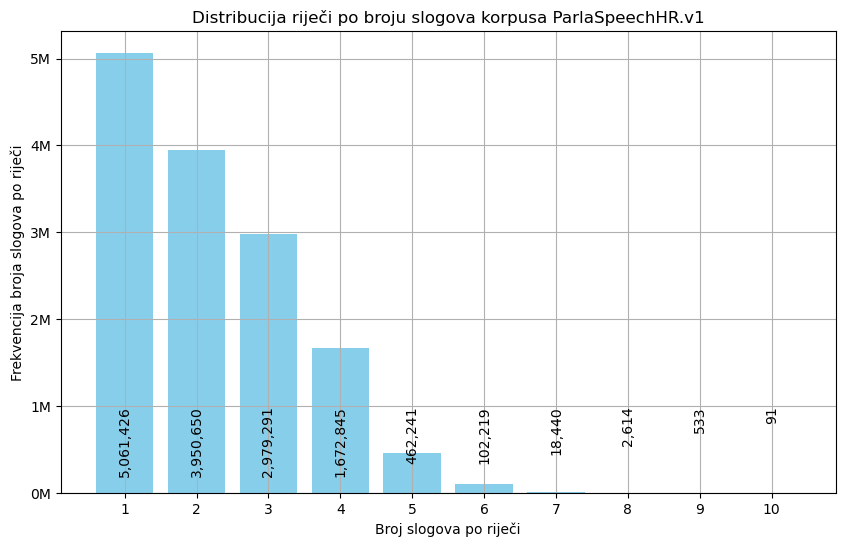

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

# Extract syllable counts and frequencies from sorted_frequency
syllable_counts = [item[0] for item in sorted_frequency[:10]]
frequencies = [item[1] for item in sorted_frequency[:10]]

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution
ax.bar(syllable_counts, frequencies, color='skyblue')
ax.set_xlabel('Broj slogova po riječi')
ax.set_ylabel('Frekvencija broja slogova po riječi')
ax.set_xticks(range(min(syllable_counts), max(syllable_counts) + 1))  # Set x-axis ticks
ax.set_title('Distribucija riječi po broju slogova korpusa ParlaSpeechHR.v1')
ax.grid(True)

# Format y-axis labels to display in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

formatter = FuncFormatter(millions_formatter)
ax.yaxis.set_major_formatter(formatter)

# Add data point annotations vertically just above the x-axis
annotation_height = plt.gca().get_ylim()[0]  # Get the bottom of the y-axis range
for count, freq in zip(syllable_counts, frequencies):
    plt.text(count, annotation_height+1000000, f'{freq:,}', ha='center', va='top', rotation='vertical', fontsize=10)

plt.show()


In [108]:
# SAVE PLOT
# Define the base filename
filename_plot = "frekvencija_slogova_riječi_ParlaSpeechHR.png"

# Check if the file already exists
if os.path.exists(filename_plot):
    # Increment the number until we find a unique filename
    index = 1
    while True:
        new_filename = f"frekvencija_slogova_riječi_ParlaSpeechHR_{index}.png"
        if not os.path.exists(new_filename):
            break
        index += 1
    filename_plot = new_filename

# Save the plot as PNG
fig.savefig(filename_plot)
print(f"Plot saved as {filename_plot}")

Plot saved as frekvencija_slogova_riječi_ParlaSpeechHR_3.png


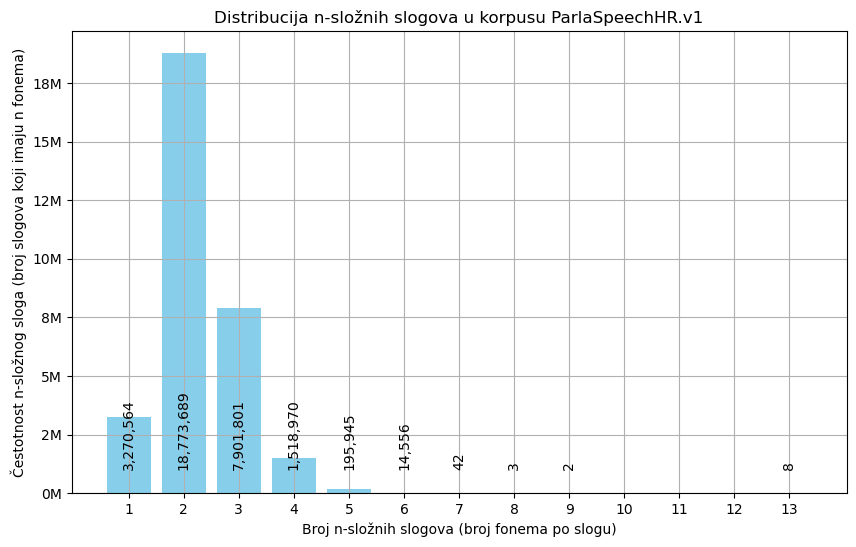

In [50]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import os

# Extract syllable counts and frequencies from sorted_frequency
syllable_counts_SPC = [item[0] for item in sorted_SPC_counts[:10]]
frequencies_SPC = [item[1] for item in sorted_SPC_counts[:10]]

# Create a new figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the distribution
ax.bar(syllable_counts_SPC, frequencies_SPC, color='skyblue')
ax.set_xlabel('Broj n-složnih slogova (broj fonema po slogu)')
ax.set_ylabel('Čestotnost n-složnog sloga (broj slogova koji imaju n fonema)')
ax.set_xticks(range(min(syllable_counts_SPC), max(syllable_counts_SPC) + 1))  # Set x-axis ticks
ax.set_title('Distribucija n-složnih slogova u korpusu ParlaSpeechHR.v1')
ax.grid(True)

# Format y-axis labels to display in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

formatter = FuncFormatter(millions_formatter)
ax.yaxis.set_major_formatter(formatter)

# Add data point annotations vertically just above the x-axis
annotation_height = plt.gca().get_ylim()[0]  # Get the bottom of the y-axis range
for count, freq in zip(syllable_counts_SPC, frequencies_SPC):
    plt.text(count, annotation_height+1000000, f'{freq:,}', ha='center', va='bottom', rotation='vertical', fontsize=10)

plt.show()


In [51]:
# SAVE PLOT
# Define the base filename
filename_plot_SPC = "frekvencija_veličine_slogova_ParlaSpeechHR.png"

# Check if the file already exists
if os.path.exists(filename_plot_SPC):
    # Increment the number until we find a unique filename
    index = 1
    while True:
        new_filename_SPC = f"frekvencija_veličine_slogova_ParlaSpeechHR_{index}.png"
        if not os.path.exists(new_filename_SPC):
            break
        index += 1
    filename_plot_SPC = new_filename_SPC

# Save the plot as PNG
fig.savefig(filename_plot_SPC)
print(f"Plot saved as {filename_plot_SPC}")

Plot saved as frekvencija_veličine_slogova_ParlaSpeechHR_1.png


In [5]:
from collections import defaultdict

def count_syllable_length_frequency(unique_syllables_sorted):
    syllable_length_frequency = defaultdict(int)
    for syllable, frequency in unique_syllables_sorted:
        syllable_length = len(syllable)
        syllable_length_frequency[syllable_length] += frequency
    return syllable_length_frequency


syllable_length_frequency = count_syllable_length_frequency(unique_syllables_sorted)

# Print syllable length frequency
print("Syllable length frequency:")
for syllable_length, frequency in sorted(syllable_length_frequency.items()):
    print(f"{syllable_length} characters: {frequency}")


Syllable length frequency:
1 characters: 3270564
2 characters: 18773689
3 characters: 7901801
4 characters: 1518970
5 characters: 195945
6 characters: 14556
7 characters: 42
8 characters: 3
9 characters: 2
10 characters: 1
12 characters: 1
13 characters: 8


In [12]:
import random
from sklearn.metrics import r2_score

# CLASS OBJECT NOW
class RandomTextGenerator:
    def __init__(self, sorted_frequency, unique_syllables_sorted, n_sentences=10, n_words_per_sentence=4):
        self.sorted_frequency_probs = self.convert_to_probabilities(sorted_frequency)
        self.unique_syllables_sorted_probs = self.convert_to_probabilities(unique_syllables_sorted)
        self.max_syllables = max(syllable for syllable, _ in sorted_frequency)
        self.n_sentences = n_sentences
        self.n_words_per_sentence = n_words_per_sentence

    @staticmethod
    def convert_to_probabilities(sorted_frequency):
        total_count = sum(count for _, count in sorted_frequency)
        probabilities = [(syllable_length, count / total_count) for syllable_length, count in sorted_frequency]
        return probabilities

    def generate_random_word(self):
        # Choose the number of syllables for the word based on the distribution
        num_syllables = random.choices([syllable_length for syllable_length, _ in self.sorted_frequency_probs],
                                       weights=[prob for _, prob in self.sorted_frequency_probs])[0]

        # Choose syllables with the chosen number of characters based on their probabilities
        syllables_with_length = [(syllable, frequency) for syllable, frequency in self.unique_syllables_sorted_probs if
                                 len(syllable) == num_syllables]
        syllable_probs = [frequency for _, frequency in syllables_with_length]
        chosen_syllable = random.choices(syllables_with_length, weights=syllable_probs)[0][0]

        return chosen_syllable

    def generate_random_sentence(self):
        # Generate random words to construct a sentence
        sentence = ' '.join(self.generate_random_word() for _ in range(self.n_words_per_sentence))

        return sentence

    def generate_text(self):
        # Generate multiple sentences to create a text
        text = '\n'.join(self.generate_random_sentence() for _ in range(self.n_sentences))

        return text


# Može automatski gledati koliko ima maksimalno slogova
# max_syllables = max(syllable for syllable, _ in sorted_frequency)
# print(f"max_syllables: {max_syllables} ")
max_syllables = 6

n_sentences = 10
n_words_per_sentence = 4

print(f"RNG GENERIRANJE REČENICA | max_syllables({max_syllables}), n_sentences({n_sentences}), n_words_per_sentence({n_words_per_sentence}) \n")


text_generator = RandomTextGenerator(sorted_frequency, unique_syllables_sorted, n_sentences, n_words_per_sentence)
generated_text = text_generator.generate_text()
print(generated_text)


RNG GENERIRANJE REČENICA | max_syllables(6), n_sentences(10), n_words_per_sentence(4) 

sre i žu tu
nan i de tvom
dat se đe ja
r i zeml i
glo o u spuš
ji a i du
a da ne te
e u kons a
i i tno i
a u funk že


In [38]:
def load_phoneme_frequencies(file_path):
    phoneme_frequencies = {}
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            phoneme, frequency, probability = line.strip().split('\t')
            phoneme_frequencies[phoneme] = int(frequency)
    return phoneme_frequencies

# Example usage:
phon_freq_file_path = 'frek_fonema_v3.0.txt' 
phoneme_frequencies = load_phoneme_frequencies(phon_freq_file_path)
print(phoneme_frequencies)


{'a': 8473320, 'o': 7134726, 'i': 7050533, 'e': 6080196, 'n': 4218185, 't': 3651668, 'r': 3511665, 's': 3255595, 'd': 2831100, 'u': 2828080, 'v': 2702877, 'j': 2634376, 'm': 2543126, 'k': 2461565, 'p': 2027631, 'l': 1885640, 'z': 1281364, 'g': 1117595, 'b': 952252, 'š': 681802, 'č': 565108, 'h': 519356, 'c': 512317, 'ć': 477359, 'nj': 430563, 'ž': 406766, 'lj': 354311, 'đ': 163320, 'f': 122684, 'dž': 3397}


In [40]:
# Frekvencija po broju fonema u slogu (1-fonski slog, 2-fonski slog, etc.) virtualno svi do 9 fonema max
custom_length_probs = [0.3, 0.3, 0.2, 0.1, 0.1]

In [72]:
import random
from scipy.stats import linregress

class TextGenerator:
    def __init__(self, sorted_frequency_probs, unique_syllables_sorted, max_syllables):
        self.sorted_frequency_probs = sorted_frequency_probs
        self.unique_syllables_sorted = unique_syllables_sorted
        self.max_syllables = max_syllables

    def generate_random_word(self, custom_length_probs=None, custom_syllable_probs=None):

        # CUSTOM FREQUENCY OF CHARS IN SYLLABLES custom_length_probs
        if custom_length_probs:
            num_syllables = random.choices(range(1, self.max_syllables + 1), weights=custom_length_probs)[0]
        else:
            num_syllables = random.choices([syllable_length for syllable_length, _ in self.sorted_frequency_probs],
                                           weights=[prob for _, prob in self.sorted_frequency_probs])[0]
            #print([prob for _, prob in self.sorted_frequency_probs])
            #print(num_syllables)
        
        
        # CUSTOM FREQUENCY OF UNIQUE SYLLABLES custom_syllable_probs
        if custom_syllable_probs:
            syllable_probs = custom_syllable_probs
        else:            
            syllable_probs = [prob for syllable, prob in self.unique_syllables_sorted if len(syllable) == num_syllables]
            #print(syllable_probs)

        # Choose syllables for the word based on their frequencies
        syllables_with_length = [syllable for syllable, _ in self.unique_syllables_sorted if len(syllable) == num_syllables]
        #print(syllables_with_length)

        # Choose a word syllable based on their frequencies
        word_syllables = random.choices(syllables_with_length, weights=syllable_probs)[0]
        #word_syllables = random.choices(syllables_with_length)[0] #podjednaka distribucija daje mnogo manji R2 (oko 0.6)

        return word_syllables

    def generate_random_sentence(self, n_words):
        # Generate random words to construct a sentence
        sentence = ' '.join(self.generate_random_word() for _ in range(n_words))
        return sentence

    def generate_text(self, n_sentences, n_words_per_sentence):
        # Generate multiple sentences to create a text
        text = '\n'.join(self.generate_random_sentence(n_words_per_sentence) for _ in range(n_sentences))
        return text

    def calculate_r_squared(self, target_frequencies, generated_text):
        # Count phoneme frequencies in the generated text
        generated_frequencies = {}
        for phoneme in target_frequencies:
            generated_frequencies[phoneme] = generated_text.count(phoneme)

        # Calculate R-squared value
        x = [target_frequencies[phoneme] for phoneme in target_frequencies]
        y = [generated_frequencies.get(phoneme, 0) for phoneme in target_frequencies]
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        r_squared = r_value ** 2
        return r_squared

max_syllables = 6
n_sentences = 50
n_words_per_sentence = 6

# koliko fonema po slogu, vjerojatnosti
custom_length_probs = [0.3, 0.4, 0.2, 0.1]

print(f"RNG GENERIRANJE REČENICA | max_syllables({max_syllables}), n_sentences({n_sentences}), n_words_per_sentence({n_words_per_sentence}) \n")


# Example usage:
text_generator = TextGenerator(sorted_frequency, unique_syllables_sorted, max_syllables)
generated_text = text_generator.generate_text(n_sentences, n_words_per_sentence)
r_squared = text_generator.calculate_r_squared(phoneme_frequencies, generated_text)
print(f"R-squared value: {r_squared:.5f}\n")
print(generated_text)


RNG GENERIRANJE REČENICA | max_syllables(6), n_sentences(50), n_words_per_sentence(6) 

R-squared value: 0.94104

r o ne u stren a
vo ves u cir ko gmen
a lir a stru a go
o r pos žnje je po
o o i ka ko njoj
da tual pla vim sreds a
smo šlja vi e jer i
s u r mo o a
o te a je i e
tvo i a dr a da
ma tnos i se i nak
tri ić i lju cijs sveu
u gu tlje e ni čet
u čni u vil zas vnom
če g cins ja dno pos
vač no fi i u zna
o nar u ti o u
raz i je greš a o
a u te u ta tra
stvar ko u šljan za o
se mo pros e loš sa
o plje o gla i ne
a e i a ži r
tual to skr i tre o
dvo o u s o ža
tnim mu ta člans go tar
li mjer na i i ja
e tno gos naj o tel
vats či o že a i
ra mor ku o vlast a
a i đer do e će
hr i stvar slo tje o
o mi te je i hdza
kva lim o pre i o
čom i se i gra mjes
a o ces i ka ma
tvors ti vor se sne i
zas o a u pi ta
bren o a da o tre
zdravs je uop na bor i
đe gois šta za o su
što po a i li a
hval ni r nom ti o
no van i u udž bjek
o ma krats ci funk vi
li na ni a du vost
vljen u do i od o
na no la

In [74]:
from collections import Counter

def count_character_frequencies(generated_text):
    # Count character frequencies in the generated text excluding spaces
    character_frequencies = Counter(char for char in generated_text if char != ' ')
    return character_frequencies

def create_rng_phoneme_frequencies(character_frequencies, phoneme_frequencies):
    # Map characters to phonemes based on similarity or some predefined mapping
    # For simplicity, let's assume characters map directly to themselves
    rng_phoneme_frequencies = {char: character_frequencies.get(char, 0) for char in phoneme_frequencies}
    return rng_phoneme_frequencies

def normalize_frequencies(frequencies, reference_order):
    total_count = sum(frequencies.values())
    probabilities = {char: freq / total_count for char, freq in frequencies.items()}
    sorted_probabilities = {char: probabilities[char] if char in probabilities else 0 for char in reference_order}
    return sorted_probabilities


character_frequencies = count_character_frequencies(generated_text)
rng_phoneme_frequencies = create_rng_phoneme_frequencies(character_frequencies, phoneme_frequencies)

print(f"RNG frekvencije:\n{rng_phoneme_frequencies}\n")
print(f"Korpus frekvencije:\n{phoneme_frequencies}\n")


reference_order = sorted(phoneme_frequencies.keys(), key=lambda x: phoneme_frequencies[x], reverse=True)


normalized_character_probabilities = normalize_frequencies(character_frequencies, reference_order)
normalized_phoneme_probabilities = normalize_frequencies(phoneme_frequencies, reference_order)

print(f"RNG vjerojatnosti:\n{normalized_character_probabilities}\n")
print(f"Korpus vjerojatnosti:\n{normalized_phoneme_probabilities}")


RNG frekvencije:
{'a': 79, 'o': 73, 'i': 58, 'e': 52, 'n': 38, 't': 37, 'r': 41, 's': 42, 'd': 14, 'u': 32, 'v': 24, 'j': 23, 'm': 18, 'k': 13, 'p': 11, 'l': 24, 'z': 9, 'g': 10, 'b': 4, 'š': 6, 'č': 8, 'h': 5, 'c': 5, 'ć': 2, 'nj': 0, 'ž': 5, 'lj': 0, 'đ': 3, 'f': 2, 'dž': 0}

Korpus frekvencije:
{'a': 8473320, 'o': 7134726, 'i': 7050533, 'e': 6080196, 'n': 4218185, 't': 3651668, 'r': 3511665, 's': 3255595, 'd': 2831100, 'u': 2828080, 'v': 2702877, 'j': 2634376, 'm': 2543126, 'k': 2461565, 'p': 2027631, 'l': 1885640, 'z': 1281364, 'g': 1117595, 'b': 952252, 'š': 681802, 'č': 565108, 'h': 519356, 'c': 512317, 'ć': 477359, 'nj': 430563, 'ž': 406766, 'lj': 354311, 'đ': 163320, 'f': 122684, 'dž': 3397}

RNG vjerojatnosti:
{'a': 0.11499272197962154, 'o': 0.10625909752547306, 'i': 0.08442503639010189, 'e': 0.07569141193595343, 'n': 0.055312954876273655, 't': 0.053857350800582245, 'r': 0.05967976710334789, 's': 0.0611353711790393, 'd': 0.020378457059679767, 'u': 0.046579330422125184, 'v': 0.

Plot saved as RNG_materijal_fonetski_balans_3.png


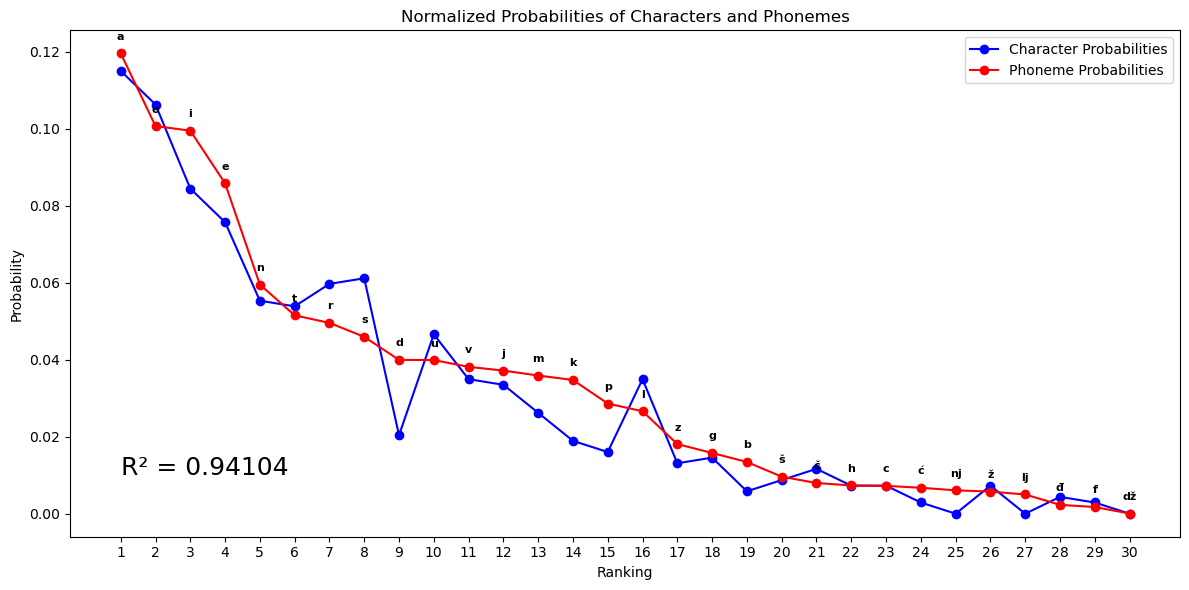

In [75]:
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(12, 6))

# Plotting character probabilities
plt.plot(range(1, len(normalized_character_probabilities) + 1), normalized_character_probabilities.values(), color='blue', marker='o', label='Character Probabilities', linestyle='-')

# Plotting phoneme probabilities
plt.plot(range(1, len(normalized_phoneme_probabilities) + 1), normalized_phoneme_probabilities.values(), color='red', marker='o', label='Phoneme Probabilities', linestyle='-')

plt.xlabel('Ranking')
plt.ylabel('Probability')
plt.title('Normalized Probabilities of Characters and Phonemes')
plt.legend()
plt.xticks(range(1, len(normalized_character_probabilities) + 1))  # X-axis ticks as rankings
plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Annotate each data point with its character, slightly above the point
offset = 0.003  # Adjust this value for vertical offset
font_size = 8  # Adjust this value for font size
for rank, char in enumerate(normalized_phoneme_probabilities.keys(), start=1):
    plt.text(rank, normalized_phoneme_probabilities[char] + offset, char, ha='center', va='bottom', fontsize=8, fontweight='bold')  # Adjust vertical position and font size

plt.text(1, 0.01, f'R² = {r_squared:.5f}', fontsize=18, ha='left')

# SAVE PLOT
# Define the base filename
filename_plot = "RNG_materijal_fonetski_balans.png"

# Check if the file already exists
if os.path.exists(filename_plot):
    # Increment the number until we find a unique filename
    index = 1
    while True:
        new_filename = f"RNG_materijal_fonetski_balans_{index}.png"
        if not os.path.exists(new_filename):
            break
        index += 1
    filename_plot = new_filename

# Save the plot as PNG
plt.savefig(filename_plot)
print(f"Plot saved as {filename_plot}")


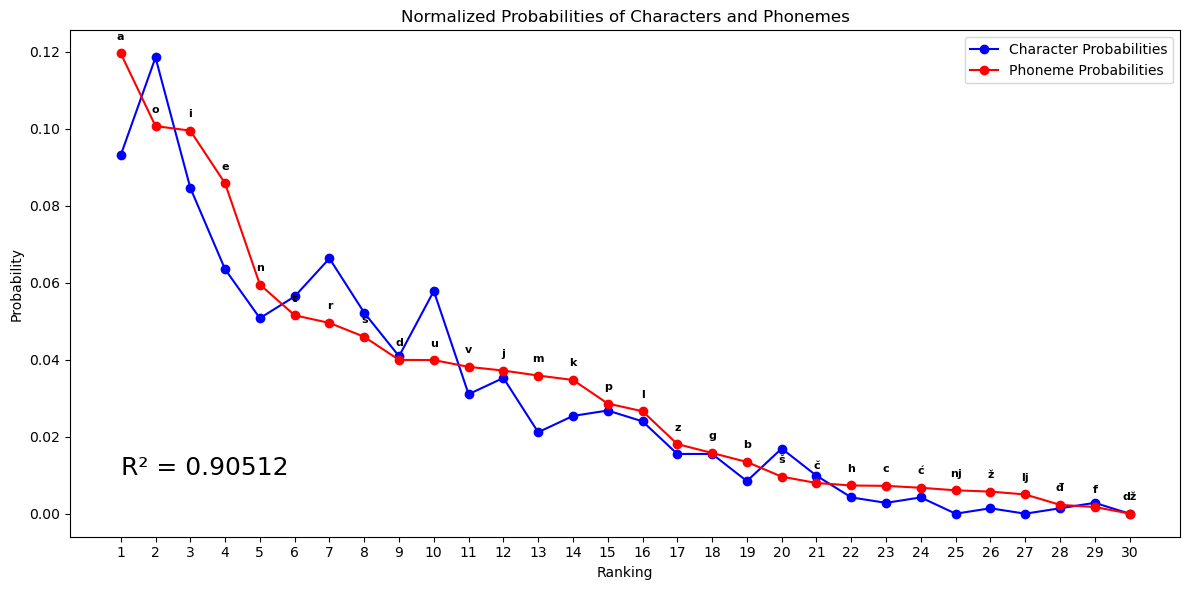

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plotting character probabilities
plt.plot(range(1, len(normalized_character_probabilities) + 1), normalized_character_probabilities.values(), color='blue', marker='o', label='Character Probabilities', linestyle='-')

# Plotting phoneme probabilities
plt.plot(range(1, len(normalized_phoneme_probabilities) + 1), normalized_phoneme_probabilities.values(), color='red', marker='o', label='Phoneme Probabilities', linestyle='-')

plt.xlabel('Ranking')
plt.ylabel('Probability')
plt.title('Normalized Probabilities of Characters and Phonemes')
plt.legend()
plt.xticks(range(1, len(normalized_character_probabilities) + 1))  # X-axis ticks as rankings
plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.text(1, 0.01, f'R² = {r_squared:.5f}', fontsize=18, ha='left')

# Annotate each data point with its character, slightly above the point
# for rank, char in enumerate(normalized_phoneme_probabilities.keys(), start=1):
#     plt.text(rank, normalized_phoneme_probabilities[char], char, ha='center', va='bottom', fontsize=8)  # Adjust font size

# Adjust vertical position and font size
offset = 0.003  # Adjust this value for vertical offset
font_size = 8  # Adjust this value for font size
for rank, char in enumerate(normalized_phoneme_probabilities.keys(), start=1):
    plt.text(rank, normalized_phoneme_probabilities[char] + offset, char, ha='center', va='bottom', fontsize=8, fontweight='bold')  # Adjust vertical position and font size

plt.show()


In [ ]:
#Kategorije glasnika u općem hrvatskom (Škarić Fonetika, str.71)

samoglasnik = [
    "ieaour"
]
polusamoglasnik = [
    "v"
]
zvonki = [
    "jrl"
]
zvonki_prigušeni = [
    "vmn"
]
strujni = [
    "fszšž"
]
poluprekidni = [
    "cč"
]
poluzatvorni = [
    "ćđ"
]
zatvorni = [
    "pbtdkg"
]

In [ ]:
#Artikulacija sloga (Škarić Fonetika, str.88, slika 40.)
samoglasnik = [
    "ieaour"
]
polusamoglasnik = [
    "v"
]
zvonki = [
    "jl"
]
zvonki_prigušeni = [
    "vmn"
]
zvučni_konsonanti =[
    "fzžđbdg"
]
bezvučni_konsonanti = [
    "sšhcčćptk"
